# Z3 For Saerch-Problem

In [1]:
%%html
<iframe src="https://en.wikipedia.org/wiki/Z3_Theorem_Prover" width="1200" height="1000"></iframe>

In [2]:
%%html
<iframe src='https://theory.stanford.edu/~nikolaj/programmingz3.html'width="1200" height="1000"></iframe>


**Z3, It can be used to check the satisfiability of logical formulas over one or more theories.**

In [3]:
from z3 import *

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Condition
* $x \lor y$
* $\neg x \lor y$
* $\neg x \lor \neg y$

In [5]:
x = Bool("x")
y = bool("y")

In [6]:
x, y = Bools("x y")

In [7]:
S = Solver()

In [8]:
S.add(Or(x, y), Or(Not(x), y), Or(Not(x), Not(y)))

In [9]:
S.check()

sat

In [10]:
print(S.model())

[y = True, x = False]


#### Condition
* $x > 2$
* $y < 10$
* $x + 2y = 7$
* $x, y \in \mathbb{Z}$

In [11]:
x = Int('x')
y = Int('y')
solve(x > 2, y < 10, x + 2*y == 7)

[y = 0, x = 7]


#### Condition
* $x^2 + y^2 > 3$
* $x^3 + y < 5$
* $x, y \in \mathbb{R}$

In [12]:
x = Real('x')
y = Real('y')
solve(x**2 + y**2 > 3, x**3 + y < 5)

[y = 2, x = 1/8]


## Fitting Rectangle

#### Model

<center><img src="rect.png" width ="500" height=500 align="center"></center>

Number rectangles from $1$ to $n$ 

for $i = 1, 2, 3, \cdots, n$ 
* $w_i$ is the **width** of rectangle i
* $h_i$ is the **height** of rectangle i
* $x_i$ is the **x-coordinate** of the left lower corner of rectangle i
* $y_i$ is the **y-coordinate** of the left lower corner of rectangle i

In [13]:
w = [Int(f'w{i}') for i in range(4)]
h = [Int(f'h{i}') for i in range(4)]

In [14]:
print(w)
print(h)

[w0, w1, w2, w3]
[h0, h1, h2, h3]


In [15]:
W = [20,40,60,30]
H = [20,70,80,20]

#### Rotation

<center><img src="Rotate.png"></center>

**Rotation conditions.**
* $(w_i = W_i \land h_i = H_i) \lor (w_i = H_i \land h_i = W_i)$
* for $i = 1, 2, 3, \cdots, n$

In [16]:
Form = [Or(And(w[i]==W[i],h[i]==H[i]), And(w[i]==H[i],h[i]==W[i])) for i in range(4)]

In [17]:
print(Form)

[Or(And(w0 == 20, h0 == 20), And(w0 == 20, h0 == 20)), Or(And(w1 == 40, h1 == 70), And(w1 == 70, h1 == 40)), Or(And(w2 == 60, h2 == 80), And(w2 == 80, h2 == 60)), Or(And(w3 == 30, h3 == 20), And(w3 == 20, h3 == 30))]


#### Being Inside.

<center><img src="Inside.png"></center>

**Being Inside conditions.**

Let 
* $(0,0)$ is lowest left corner of big rectangle.
* $W$ is width of big **rectangele**.
* $H$ is height of big **rectangle**.

Condition.
* $x_i \geq 0 \land x_i + w_i \leq W$
* $y_i \geq 0 \land y_i + h_i \leq H$ 
* for all $i = 1, 2, 3, \cdots, n$


In [18]:
Width = 100
Height = 100

In [19]:
x = [Int(f'x{i}') for i in range(4)]
y = [Int(f'y{i}') for i in range(4)]

In [20]:
IN = [And(x[i]>=0,x[i]+w[i]<=Width,y[i]>=0,y[i]+h[i]<=Height) for i in range(4)]

#### Non-Overlab

**Non-Overlab conditions.**

Let $I$ and $J$ be rectangle.

* $(x_i, y_i)$ be a lower corner of $I$
* $(x_j, y_j)$ be a lower corner of $J$
* $w_i$ be the width of $I$
* $h_i$ be the height of $I$
* $w_j$ be the width of $J$
* $h_j$ be the height of $J$


condition.

* $x_i + w_i \leq x_j$ or
* $x_j + w_j \leq x_i$ or
* $y_i + h_i \leq y_j$ or
* $y_j + h_j \leq y_i$

In [21]:
Overlap = []
for i,j in [(m,k) for m in range(4) for k in range(4) if m < k]:
    Overlap = Overlap + [Or(x[i]+w[i]<=x[j],x[j]+w[j]<=x[i],y[i]+h[i]<=y[j],y[j]+h[j]<=y[i])]

#### Solve

In [22]:
s = Solver()
s.add(Form + IN + Overlap)

In [23]:
s.check()

sat

In [24]:
m = s.model()

#### Visulize

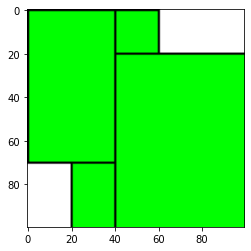

In [25]:
img = np.zeros([Width,Height,3],dtype=np.uint8)
img.fill(255)
for i in range(4):
    X = m[x[i]].as_long()
    Y = m[y[i]].as_long()
    W = m[w[i]].as_long()
    H = m[h[i]].as_long()
    cv2.rectangle(img,(X,100-Y),((X+W),100-(Y+H)),(0,255,0),-1)
    cv2.rectangle(img,(X,100-Y),((X+W),100-(Y+H)),(0,0,0),1)
plt.imshow(img)

#### Optimization

<center><img src="Optimization.png"></center>

<center><img src="RECT_3.png"></center>

<a href="https://github.com/OrnlyP63/BETACUBE/blob/master/BETACUBE/ProjectBETACUBE.ipynb" >Github</a>

## Special Thank for Images

* Nathakit keawtoomla

* Tinnapat jaimunt

# Follow Me.

* <a href="https://github.com/OrnlyP63">https://github.com/OrnlyP63</a>

* <a href = "https://medium.com/@phiphatchomchit"> https://medium.com/@phiphatchomchit</a>